#**PREPARACIÓN DE DATOS**
---
La etapa de preparación de datos constituye un paso fundamental dentro del proceso de minería de datos, ya que busca garantizar la calidad, consistencia y adecuación de la información antes de aplicar cualquier técnica de modelado predictivo. En esta fase se realiza la organización, limpieza y transformación del conjunto de datos con el fin de obtener una base confiable que permita extraer patrones y construir modelos precisos.


En este caso, se trabaja con el dataset “Diabetes Health Indicators Dataset”, disponible públicamente en la plataforma Kaggle (https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset). Dicho conjunto contiene indicadores de salud recopilados a partir de encuestas y registros clínicos, que permiten analizar los factores asociados al riesgo de padecer diabetes.

Durante esta sección, se llevarán a cabo las siguientes tareas:

1. Integración de los datos
2. Eliminar variables irrelevantes/redundantes
3. Descripción estadística de los datos
4. Limpieza de datos atípicos
5. Limpieza de datos nulos
6. Análisis de correlaciones para redundancias
7. Análisis de correlaciones para irrelevancias (sólo predicción)
8. Balanceo de datos (sólo clasificación)
9. Transformaciones


El resultado de este proceso será un dataset limpio, estructurado y listo para el análisis exploratorio y el modelado predictivo.

#1. Integración de los datos

En esta etapa, se carga el conjunto de datos alojado en el repositorio con el nombre de archivo ***diabetes_dataset.csv***. Previo a la visualización de los datos, es necesario importar las librearias necesarias para las etapas proximas en este proceso de preparación de datos.

In [14]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [15]:
# Se cargan los datos
data = pd.read_csv("diabetes_dataset.csv") #Cargar datos en excel
data.head() #muestras los 5 primeros registros

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [17]:
#Corrección del tipo de datos object a categorías
data['gender'] = data['gender'].astype('category')
data['ethnicity'] = data['ethnicity'].astype('category')
data['education_level'] = data['education_level'].astype('category')
data['income_level'] = data['income_level'].astype('category')
data['employment_status'] = data['employment_status'].astype('category')
data['smoking_status'] = data['smoking_status'].astype('category')
data['diabetes_stage'] = data['diabetes_stage'].astype('category')

# Verificar los tipos de datos después de la conversión
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

In [18]:
data.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

#2. Eliminar variables irrelevantes/redundantes

En esta tarea se identifican y eliminan las variables que no aportan información útil al análisis o al modelo predictivo, tales como datos personales (nombre, ID, cédula, teléfono, dirección, entre otros) que varían en cada registro y no influyen en el resultado. De igual forma, se descartan variables redundantes que puedan generar duplicidad o ruido en los datos.

Debido a la alta cantidad de columnas, aplicamos el uso de IA para analizar cuales son las variables irrelevantes. Esta fue la respuesta que nos arrojo la IA:

* **diabetes_risk_score:**

  Generalmente es un índice calculado a partir de otras variables (edad, IMC, presión arterial, etc.).

  Si lo dejas, el modelo podría “hacer trampa”, ya que ese score ya resume la información de las otras variables.

  ➤ Recomendado eliminarlo (es redundante).


* **diabetes_stage:**

  Suele representar el nivel de severidad o fase del diagnóstico (por ejemplo: prediabetes, diabetes tipo 2).

  Si tu variable objetivo es diagnosed_diabetes (clasificación binaria: sí/no), esta variable estaría altamente correlacionada o incluso derivada de la misma.

  ➤ Recomendado eliminarla para evitar fuga de información (“data leakage”).




In [19]:
# Eliminación de variables irrelevantes o redundantes
data = data.drop(['diabetes_risk_score', 'diabetes_stage'], axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

#3. Descripción estadística de los datos
En esta etapa se realiza un análisis estadístico descriptivo de las variables del dataset, con el propósito de conocer su comportamiento general, identificar rangos, medidas de tendencia central (media, mediana) y dispersión (desviación estándar), así como detectar posibles valores atípicos o distribuciones anómalas que puedan influir en el modelado posterior.

In [21]:
# Descripción breve de datos numericos
data.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,1.000000


In [9]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 29/29 [00:00<00:00, 57.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: ylabel='diagnosed_diabetes'>

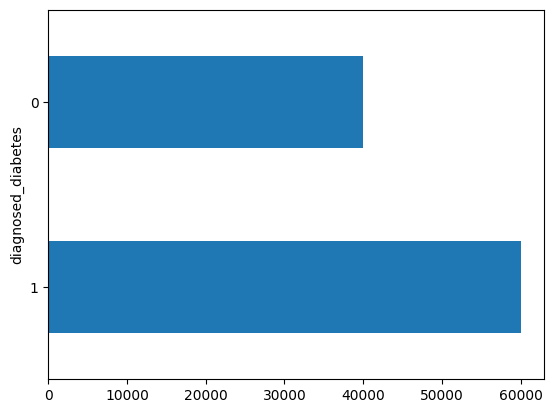

In [23]:
data['diagnosed_diabetes'].value_counts().plot(kind='barh')

In [10]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output_diabetes_dataset.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#4. Limpieza de datos atípicos

En esta etapa se identifican y tratan los valores atípicos o extremos que se alejan significativamente del comportamiento general de los datos, ya que pueden distorsionar los resultados estadísticos y afectar el desempeño del modelo predictivo. Se aplican técnicas para su corrección o eliminación según el caso.

Luego de analizar el rango de cada una de las variables del dataset mediante la visualización interactiva en HTML, se determinó que no existen valores fuera de los rangos esperados. En consecuencia, no se identificaron datos atípicos (outliers) que requirieran corrección o eliminación.

#5. Limpieza de datos nulos: Imputación
En esta etapa se aplican estrategias para el tratamiento de valores faltantes, con el fin de evitar sesgos o pérdida de información en el análisis. Se eliminan registros o variables con más del 15 % de datos nulos y, en los casos restantes, se imputan los valores faltantes utilizando medidas estadísticas (media, mediana o moda) o métodos de predicción basados en minería de datos.

In [24]:
#Observar la cantidad de registros y determinar si hay datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

De acuerdo a la información anterior, se determina que **no hay datos nulos**

Sin embargo, de acuerdo al formato html generado anteriormente, es necesario modificar algunas variables que son numéricas, pero que de acuerdo a su variedad de valores y rango, debería ser categóricas.

In [25]:
#Corrección del tipo de datos object a categorías
data['alcohol_consumption_per_week'] = data['alcohol_consumption_per_week'].astype('category')
data['family_history_diabetes'] = data['family_history_diabetes'].astype('category')
data['hypertension_history'] = data['hypertension_history'].astype('category')
data['cardiovascular_history'] = data['cardiovascular_history'].astype('category')
data['diagnosed_diabetes'] = data['diagnosed_diabetes'].astype('category')

# Verificar los tipos de datos después de la conversión
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  category
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

# 6. Análisis de correlaciones para redundancias
En esta etapa se analiza el grado de correlación entre las variables con el fin de detectar aquellas que presentan una alta dependencia (correlación mayor a 0.8). Las variables altamente correlacionadas se eliminan para evitar redundancia y multicolinealidad, mejorando así la eficiencia y estabilidad del modelo predictivo.

Para esta tarea, es necesario normalizar aquellas variables categoricas, es decir, crearles Dummies.

In [27]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, columns=['gender', 'ethnicity', 'education_level', 'income_level','employment_status', 'smoking_status',
                                         'alcohol_consumption_per_week'], drop_first=False, dtype=int)
data_num = pd.get_dummies(data_num, columns=['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes'], drop_first=True, dtype=int)
data_num.head()

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,...,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10,family_history_diabetes_1,hypertension_history_1,cardiovascular_history_1,diagnosed_diabetes_1
0,58,215,5.7,7.9,7.9,30.5,0.89,134,78,68,...,0,0,0,0,0,0,0,0,0,1
1,48,143,6.7,6.5,8.7,23.1,0.80,129,76,67,...,0,0,0,0,0,0,0,0,0,0
2,60,57,6.4,10.0,8.1,22.2,0.81,115,73,74,...,0,0,0,0,0,0,1,0,0,1
3,74,49,3.4,6.6,5.2,26.8,0.88,120,93,68,...,0,0,0,0,0,0,0,0,0,1
4,46,109,7.2,7.4,5.0,21.2,0.78,92,67,67,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#Correlaciones: variables numéricas
correlaciones = data_num.corr()
correlaciones

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,...,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10,family_history_diabetes_1,hypertension_history_1,cardiovascular_history_1,diagnosed_diabetes_1
age,1.000000,0.003352,-0.003326,-0.002802,-0.004704,0.092643,0.069654,0.547696,0.196996,-0.000597,...,0.001124,0.000406,-0.002839,-0.003140,0.000755,-0.006483,-0.002877,0.177706,0.146797,0.137713
physical_activity_minutes_per_week,0.003352,1.000000,-0.002470,-0.004735,0.000996,-0.071907,-0.053932,-0.008599,-0.008632,-0.253275,...,-0.002331,0.000677,0.001893,0.003772,0.002818,-0.002327,-0.007021,-0.001176,0.000466,-0.100774
diet_score,-0.003326,-0.002470,1.000000,0.001255,0.002113,-0.201303,-0.154968,-0.040278,-0.030300,0.000294,...,0.000903,-0.006082,0.003248,0.002029,0.008898,-0.000238,0.000336,0.001806,0.003828,-0.044298
sleep_hours_per_day,-0.002802,-0.004735,0.001255,1.000000,0.004732,0.000400,0.000788,-0.001312,-0.002214,0.010428,...,-0.002207,0.000119,0.000088,0.004180,0.001465,0.002869,0.003642,0.004753,-0.000437,-0.000399
screen_time_hours_per_day,-0.004704,0.000996,0.002113,0.004732,1.000000,-0.003019,-0.002765,-0.001859,-0.000021,-0.000515,...,0.002439,0.001123,0.005711,-0.001263,-0.002009,-0.000718,-0.001641,-0.001567,-0.002255,0.018127
bmi,0.092643,-0.071907,-0.201303,0.000400,-0.003019,1.000000,0.765744,0.245304,0.150501,0.015259,...,-0.005984,0.001213,-0.002860,-0.002260,0.000914,0.002353,0.000309,0.014494,0.009956,0.097057
waist_to_hip_ratio,0.069654,-0.053932,-0.154968,0.000788,-0.002765,0.765744,1.000000,0.188559,0.115979,0.012909,...,-0.002991,0.000817,-0.002595,-0.001150,0.002640,-0.002490,0.003107,0.013719,0.005370,0.078918
systolic_bp,0.547696,-0.008599,-0.040278,-0.001312,-0.001859,0.245304,0.188559,1.000000,0.136825,0.002958,...,-0.001118,-0.003790,-0.007401,-0.001224,-0.001621,-0.001972,-0.001036,0.098397,0.081879,0.095481
diastolic_bp,0.196996,-0.008632,-0.030300,-0.002214,-0.000021,0.150501,0.115979,0.136825,1.000000,0.000657,...,0.000915,0.000034,0.000087,-0.004309,-0.003530,-0.004215,0.002919,0.039952,0.026001,0.035619
heart_rate,-0.000597,-0.253275,0.000294,0.010428,-0.000515,0.015259,0.012909,0.002958,0.000657,1.000000,...,0.000215,0.002342,0.000515,-0.002150,-0.000862,0.000196,0.005585,0.000922,0.005019,0.022785


<Axes: >

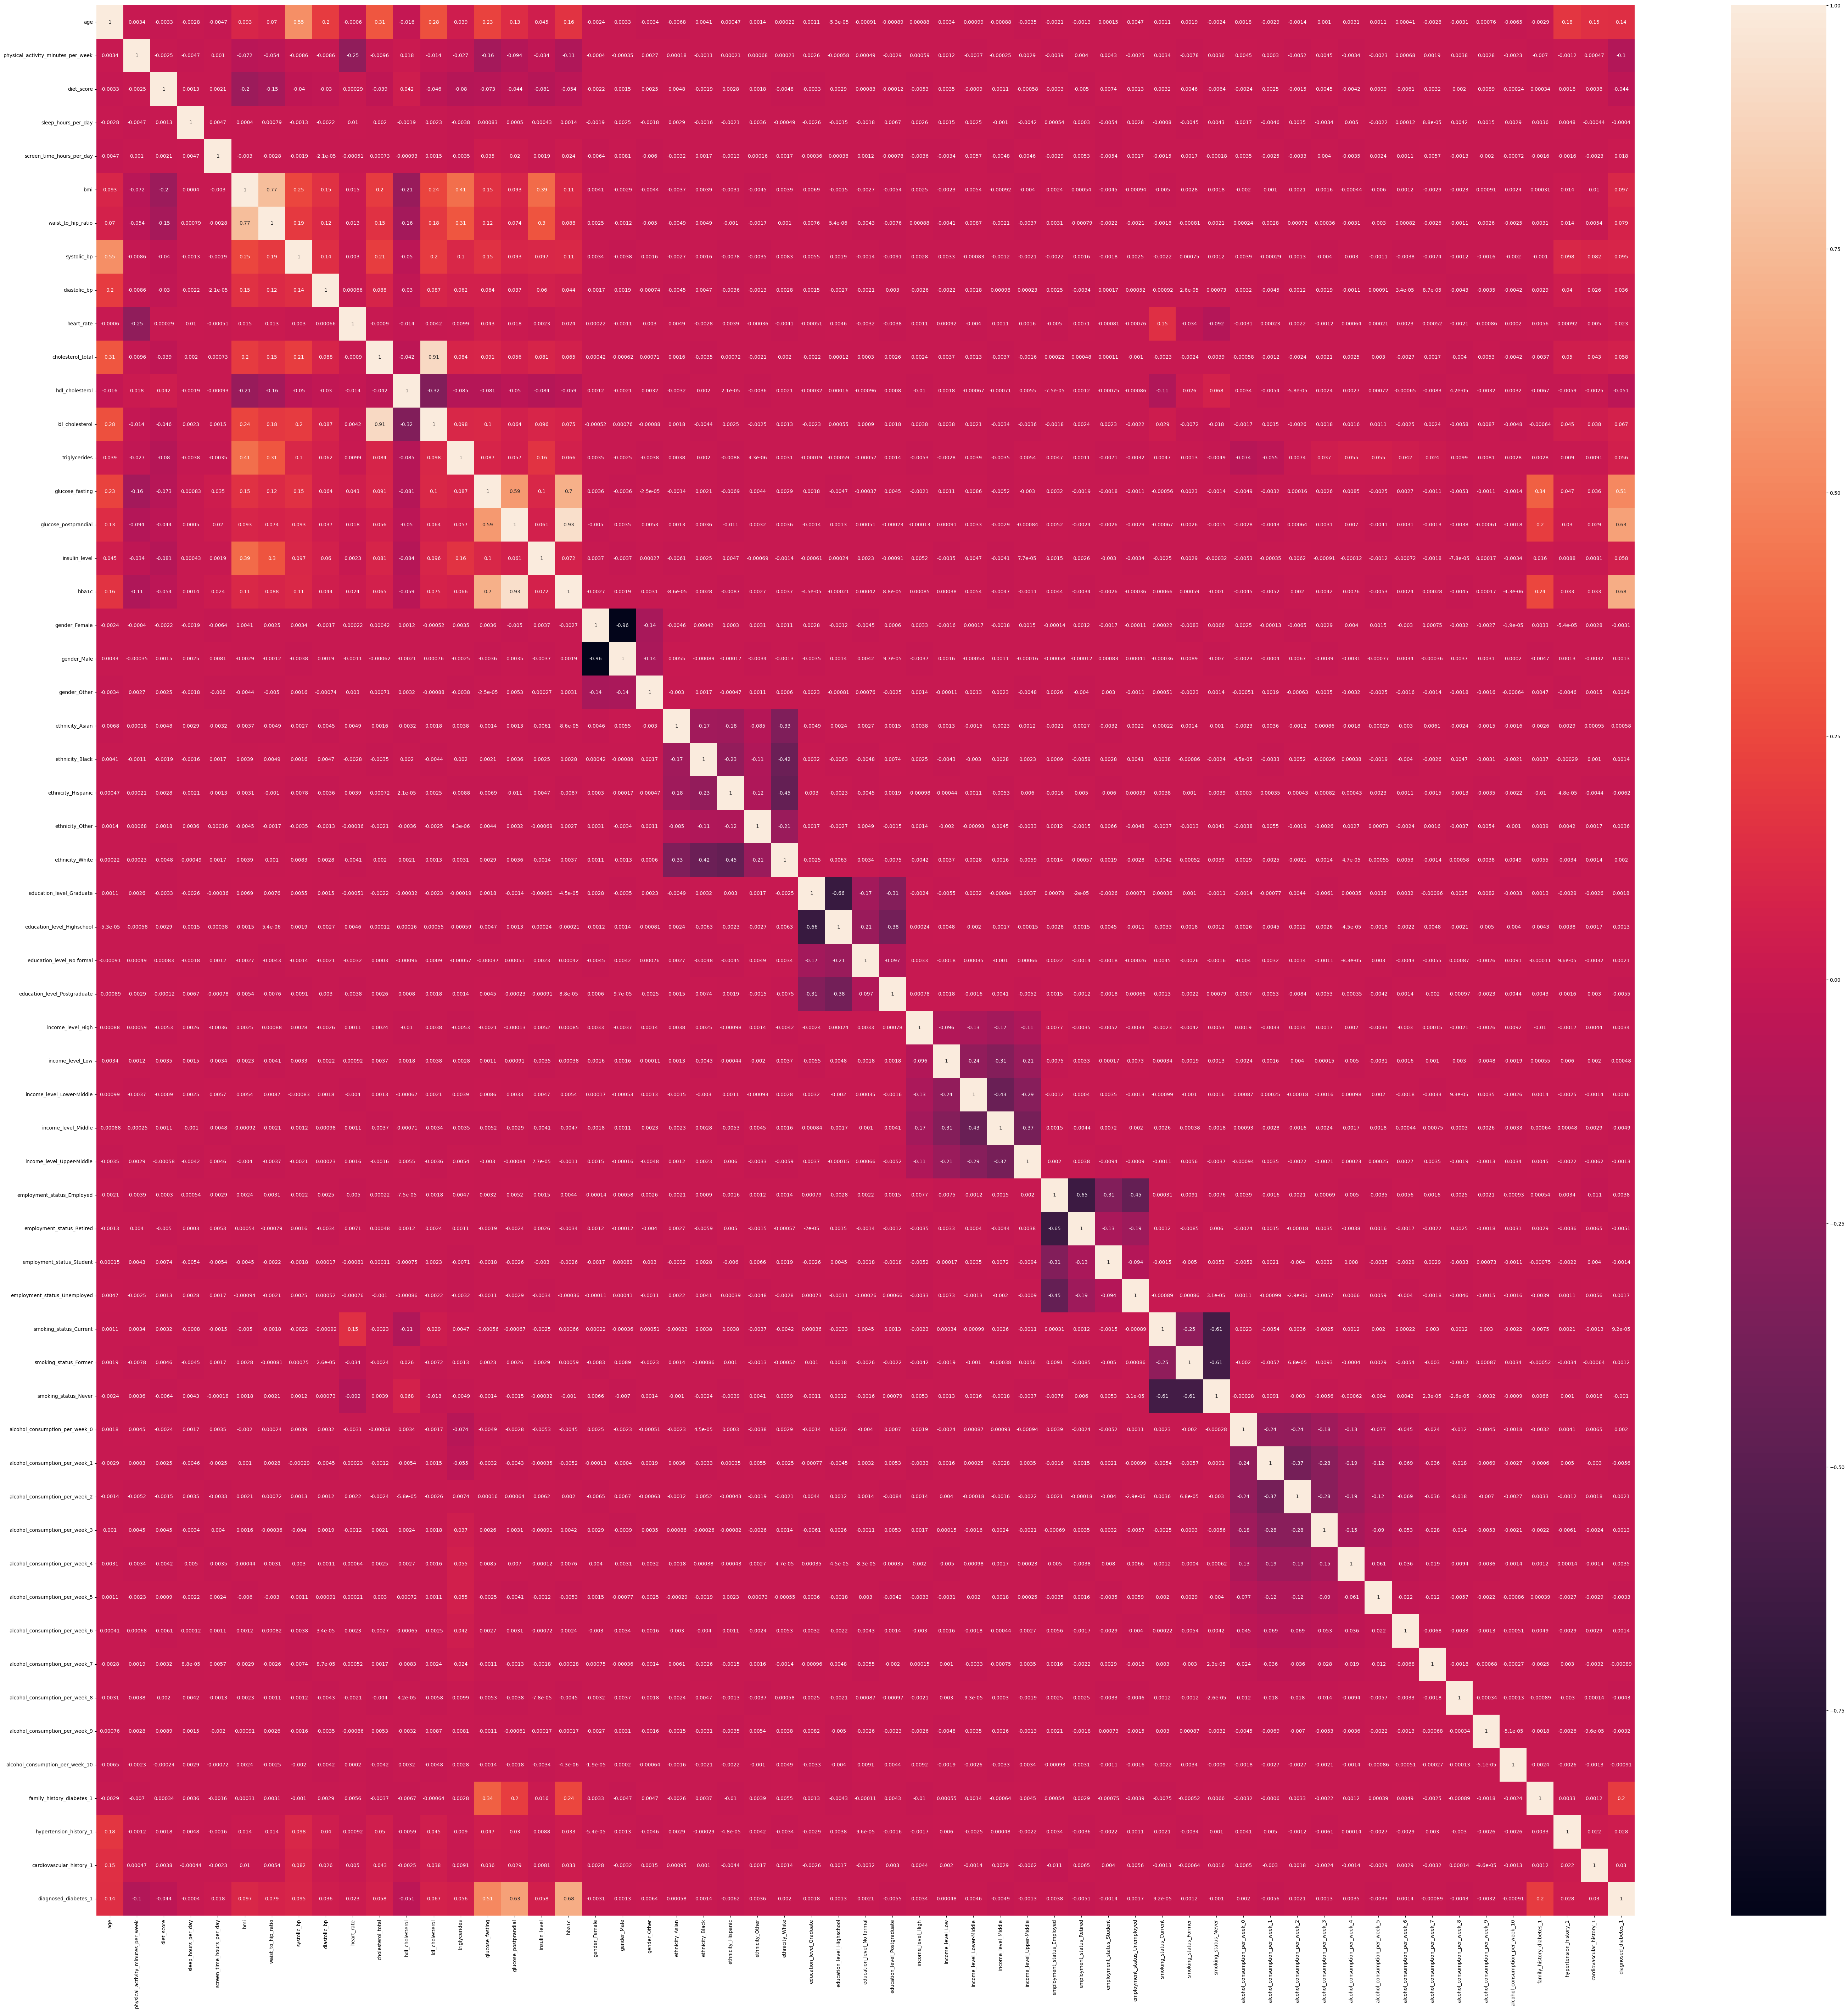

In [31]:
# Mapa de Calor
import seaborn as sns
plt.figure(figsize=(70,70))
sns.heatmap(data_num.corr(),annot=True)

In [33]:
# Calcular las correlaciones de todas las variables numéricas con la variable objetivo
correlaciones = data_num.corr(numeric_only=True)['diagnosed_diabetes_1'].sort_values(ascending=False)

# Mostrar todas las correlaciones
print(correlaciones)

# Filtrar variables irrelevantes (correlación muy baja)
irrelevantes = correlaciones[abs(correlaciones) < 0.05]
print("\n🔹 Variables con correlación baja (< 0.05) con la variable objetivo:\n")
print(irrelevantes)

diagnosed_diabetes_1                  1.000000
hba1c                                 0.679397
glucose_postprandial                  0.629832
glucose_fasting                       0.510919
family_history_diabetes_1             0.197926
age                                   0.137713
bmi                                   0.097057
systolic_bp                           0.095481
waist_to_hip_ratio                    0.078918
ldl_cholesterol                       0.067475
cholesterol_total                     0.058173
insulin_level                         0.057715
triglycerides                         0.056230
diastolic_bp                          0.035619
cardiovascular_history_1              0.029793
hypertension_history_1                0.027524
heart_rate                            0.022785
screen_time_hours_per_day             0.018127
gender_Other                          0.006430
income_level_Lower-Middle             0.004587
employment_status_Employed            0.003845
ethnicity_Oth

In [34]:
data.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,68,239,41,160,145,136,236,6.36,8.18,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,67,116,55,50,30,93,150,2.00,5.63,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,74,213,66,99,36,118,195,5.07,7.51,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,68,171,50,79,140,139,253,5.28,9.03,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,67,210,52,125,160,137,184,12.74,7.20,1


Luego del analisis de correlacción respecto a la variable objetivo, estas serian las va